## GeohashPandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/main/docs/notebooks/12_geohash.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD?filepath=docs/notebooks/12_geohash.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgridpandas/blob/main/docs/notebooks/12_geohash.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgridpandas/12_geohash.ipynb)

Full VgridPandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid in Python or CLI, use [vgrid](https://pypi.org/project/vgrid/) package. Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgridpandas
Uncomment the following line to install [vgridpandas](https://pypi.org/project/vgridpandas/).

In [1]:
# %pip install vgridpandas

### Latlon to Geohash

In [2]:
import pandas as pd
from vgridpandas import geohashpandas          
df = pd.read_csv('https://github.com/uber-web/kepler.gl-data/raw/master/nyctrips/data.csv')
df = df.head(100)
df = df.rename({'pickup_longitude': 'lon', 'pickup_latitude': 'lat'}, axis=1)[['lon', 'lat', 'passenger_count']]
resolution = 2
df = df.geohash.latlon2geohash(resolution)
df.head()

,lon,lat,passenger_count,geohash,geohash_res
0,-73.993896,40.750111,1,dr,2
1,-73.976425,40.739811,1,dr,2
2,-73.968704,40.754246,5,dr,2
3,-73.863060,40.769581,5,dr,2
4,-73.945541,40.779423,1,dr,2


### Geohash to geo boundary

In [3]:
df = df.geohash.geohash2geo()
df.head()

,lon,lat,passenger_count,geohash,geohash_res,geometry
0,-73.993896,40.750111,1,dr,2,"POLYGON ((-78.75 39.375, -67.5 39.375, -67.5 4..."
1,-73.976425,40.739811,1,dr,2,"POLYGON ((-78.75 39.375, -67.5 39.375, -67.5 4..."
2,-73.968704,40.754246,5,dr,2,"POLYGON ((-78.75 39.375, -67.5 39.375, -67.5 4..."
3,-73.863060,40.769581,5,dr,2,"POLYGON ((-78.75 39.375, -67.5 39.375, -67.5 4..."
4,-73.945541,40.779423,1,dr,2,"POLYGON ((-78.75 39.375, -67.5 39.375, -67.5 4..."


### (Multi)Linestring/ (Multi)Polygon to Geohash

<Axes: >

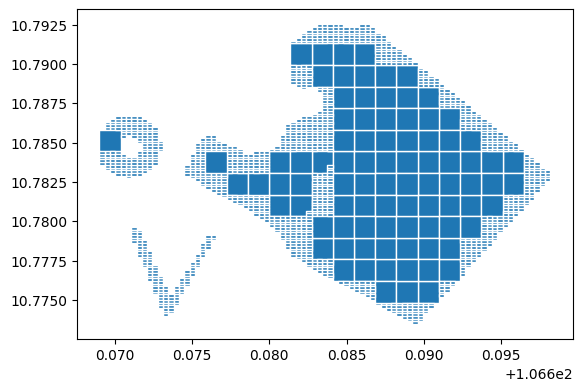

In [6]:
import geopandas as gpd
from vgridpandas import geohashpandas

gdf = gpd.read_file('https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/polygon.geojson')
resolution = 8
gdf_polyfill = gdf.geohash.polyfill(resolution, predicate = "intersects", compact = True)
gdf_polyfill = gdf_polyfill.geohash.geohash2geo()
gdf_polyfill.plot(edgecolor = "white")

### Geohash point binning

<Axes: >

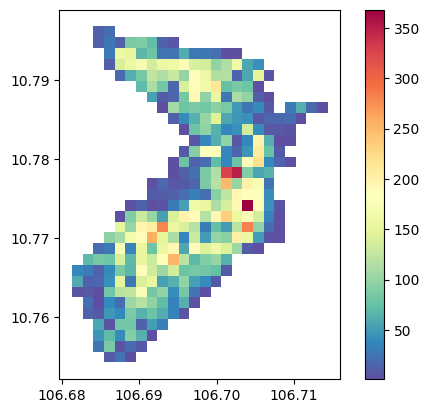

In [7]:
import geopandas as gpd
from vgridpandas import geohashpandas   
# df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
resolution = 7
stats = "count"
df_bin = df.geohash.geohashbin(resolution=resolution, stats = stats, 
                                # numeric_column="confidence",
                                # category_column="category",
                                return_geometry=True)
df_bin.plot(        
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)
